### Import Dependencies

In [15]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            classification_report, 
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve,
                            f1_score,
                            precision_score,
                            recall_score,
                            accuracy_score
                            )

### Purpose of Building a Base Model

A base model gives you a minimum expected performance. This helps you determine if your more complex models are actually learning and improving over naive strategies.

For classification: Could be predicting the majority class.

For regression: Could be predicting the mean or median of the target variable.

### Quick Overview of Logistic Regression

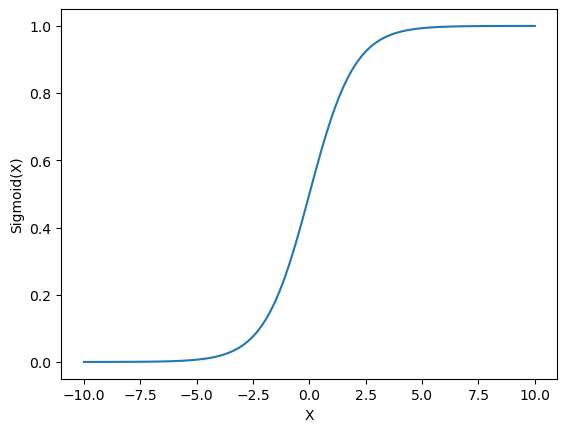

In [6]:
def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))

X_linespace = np.linspace(-10, 10, 100)
"""
In NumPy, np.linspace is a function used to create an array of evenly spaced 
values over a specified interval. It’s especially useful when you want a 
specific number of values between a start and end point.
"""
Y_hat_linespace = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat_linespace, label='Sigmoid Function')
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.show()

### Loading the Data

In [8]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### Model Training

In [10]:
model_lr = LogisticRegression(
                                random_state = 42,
                                max_iter = 1000
                        )

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Inference 

In [12]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [13]:
Y_hat_train

array([1, 1, 0, ..., 0, 1, 1])

In [14]:
Y_proba_train

array([[0.21100832, 0.78899168],
       [0.42855036, 0.57144964],
       [0.59208259, 0.40791741],
       ...,
       [0.56888894, 0.43111106],
       [0.07932241, 0.92067759],
       [0.41491097, 0.58508903]])

### Evaluation

In [19]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [20]:
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}') 
print(f'f1_score: {f1_score}')

accuracy: 0.72
precision: 0.3908701854493581
recall: 0.6732186732186732
f1_score: 0.49458483754512633


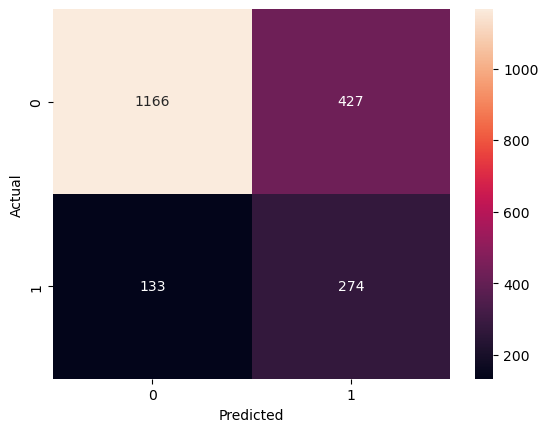

In [24]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Actual = 1, Predicted = 1: True Positive
- Actual = 0, Predicted = 0: True Negative
- Actual = 1, Predicted = 0: False Negative
- Actual = 0, Predicted = 1: False Positive

Values in the diagonal are the actual correct predictions